# Machine Learning with Python

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## 1.4 Clustering

[Clustering](https://scikit-learn.org/stable/modules/clustering.html) is an unsupervised technique with the aim of producing labelled groups. It is often a good way to examine unlabelled data to discover new insights into its substructure.

### k-means

The k-means heuristic acts on the raw data. We need to provide the number of clusters, *k*.

It is an iterative procedure that first guesses the locations of *k* cluster centres, assigns data points to the cluster with the nearest centre, then updates the locations of the centres.

k-means works well for compact, well-separated clusters with similar variance but may perform poorly in other cases.

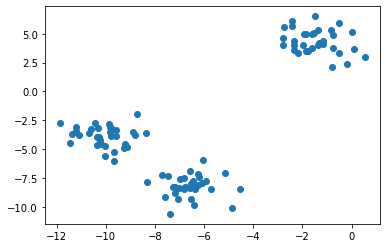

In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generate synthetic two-dimensional data
X, y = make_blobs(random_state=1)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [3]:
# build the clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [4]:
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


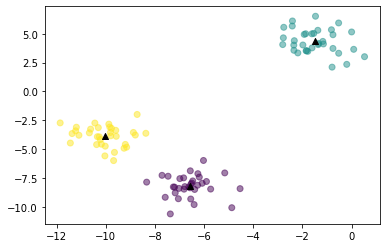

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, alpha=0.5)
plt.scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1], 
    c='k',
    marker='^')
plt.show()

k too low or too high?

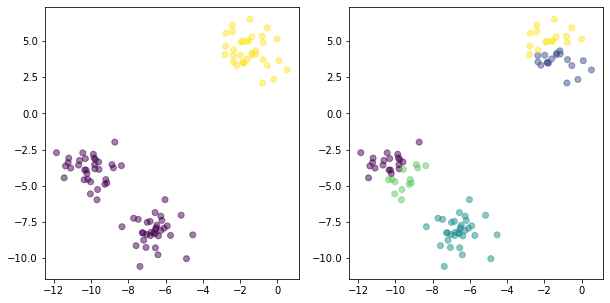

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

axes[0].scatter(X[:, 0], X[:, 1], c=assignments, alpha=0.5)

# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

axes[1].scatter(X[:, 0], X[:, 1], c=assignments, alpha=0.5)
plt.show()

Clusters with different densities?

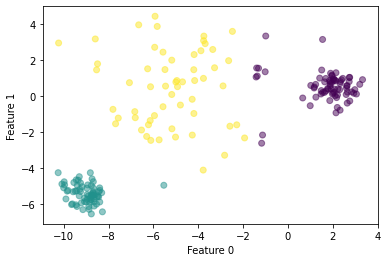

In [7]:
X_varied, y_varied = make_blobs(
    n_samples=200,
    cluster_std=[0.5, 2.2, 0.5],
    random_state=170)
y_pred = KMeans(
    n_clusters=3, 
    random_state=0).fit_predict(X_varied)

plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred, alpha=0.5)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

Anisotropic data?

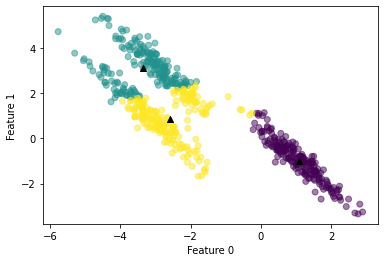

In [8]:
# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# cluster the data into three clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, alpha=0.5)
plt.scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1],
    marker='^', c='k')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

More complex cluster shapes?

Text(0, 0.5, 'Feature 1')

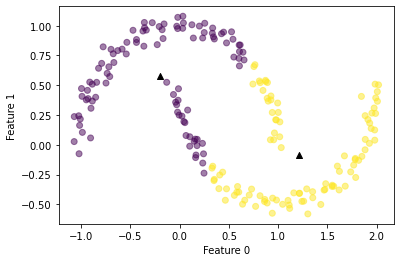

In [9]:
# generate synthetic two_moons data (with less noise this time)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# cluster the data into two clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, alpha=0.5 )
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1],
            marker='^',
            c='k')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### Agglomerative clustering

This is a family of methods that progressively combine data points to produce a hierarchical clustering.

We can choose the *linkage criterion* to specify how to decide which pair of clusters is considered "most similar".

* *Complete linkage* merges clusters that have the smallest maximum distance between their data points.
* *Average linkage* merges clusters that have the smallest mean pairwise distance between their data points.
* *Ward linkage* merges clusters so that the total within-cluster variance increases the least. This is the default behaviour

We need to provide a value for the desired number of clusters that will be output.

Text(0, 0.5, 'Feature 1')

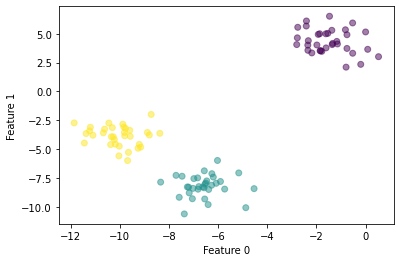

In [10]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=assignment, alpha=0.5)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Let's look in more detail at how this works, using a smaller data set.

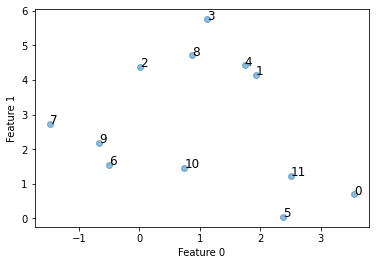

In [11]:
# Import the dendrogram function and the ward clustering function from SciPy
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)

plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
for i in range(len(X)):
    plt.text(X[i, 0], X[i, 1], str(i), fontdict={"size": 12})
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()


In [12]:
# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(X)
linkage_array

array([[ 1.        ,  4.        ,  0.3320945 ,  2.        ],
       [ 6.        ,  9.        ,  0.64580193,  2.        ],
       [ 2.        ,  8.        ,  0.92683223,  2.        ],
       [ 0.        , 11.        ,  1.1803787 ,  2.        ],
       [ 5.        , 15.        ,  1.30311575,  3.        ],
       [ 7.        , 13.        ,  1.4440339 ,  3.        ],
       [ 3.        , 14.        ,  1.60041812,  3.        ],
       [12.        , 18.        ,  2.07815795,  5.        ],
       [10.        , 17.        ,  2.15981886,  4.        ],
       [16.        , 20.        ,  6.55024854,  7.        ],
       [19.        , 21.        ,  7.92446877, 12.        ]])

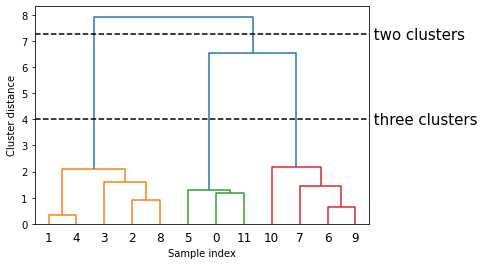

In [13]:
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

# mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.show()

### DBSCAN

DBSCAN (Density-based spectral clustering of applications with noise) is another useful algorithm for clustering. It has the benefit that the number of clusters does not need to be specified in advance. It can capture clusters with complex shapes, and also identify points that do not belong to any cluster.


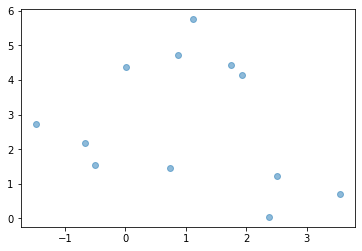

In [14]:
X, y = make_blobs(random_state=0, n_samples=12)

plt.scatter(X[:, 0], X[:, 1], alpha=0.5)

plt.show()

In [15]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("Cluster memberships:\n{}".format(clusters))

Cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


The cluster label `-1` means "noise"!

There were no regions of the data that were considered "dense", under the default settings.

Let's try again on the "moons" data set.

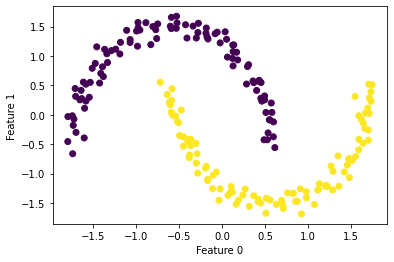

In [17]:
from sklearn.preprocessing import StandardScaler

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# Rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

### Evaluation of clustering

In general it is difficult to assess the "quality" of the clusters that we obtain. However, in some circumstances we can calculate meaningful measures of quality.

#### Evaluation with ground truth

For data sets that have associated class labels as targets (i.e. not features used in the clustering), we can use measures such as the *Adjusted Rand Index* (ARI) to evaluate agreement with the ground truth.

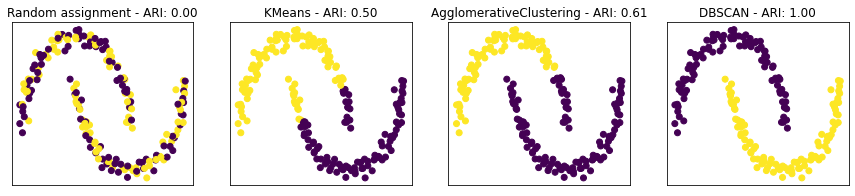

In [18]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.preprocessing import StandardScaler

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# Rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={"xticks": (), "yticks": ()})

# make a list of algorithms to use
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# plot random assignment
axes[0].scatter(
    X_scaled[:, 0],
    X_scaled[:, 1],
    c=random_clusters,
)
# ! Use ground truth y to compute ARI and evaluate algorithms
axes[0].set_title(
    "Random assignment - ARI: {:.2f}".format(adjusted_rand_score(y, random_clusters))
)

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters)
    ax.set_title(
        "{} - ARI: {:.2f}".format(
            algorithm.__class__.__name__, adjusted_rand_score(y, clusters)
        )
    )


#### Evaluation without ground truth

When class labels are not available, we can use other measures such as the *silhouette score* to get information about the relative compactness of the clusters found. 

However, in practice these approaches can often be misleading, as the most compact clusterings do not always coincide with the "best" solutions for more complex shapes.

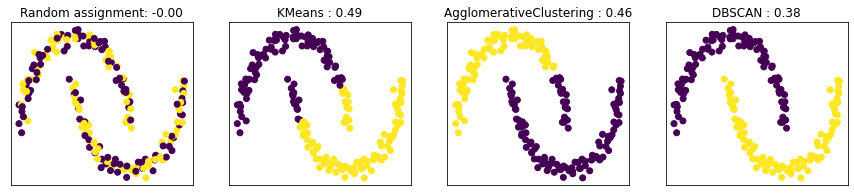

In [35]:
from sklearn.metrics.cluster import silhouette_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={"xticks": (), "yticks": ()})

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# plot random assignment
axes[0].scatter(
    X_scaled[:, 0],
    X_scaled[:, 1],
    c=random_clusters,
)
# ! Silhouette score does not require ground truth y
axes[0].set_title(
    "Random assignment: {:.2f}".format(silhouette_score(X_scaled, random_clusters))
)

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    # plot the cluster assignments and cluster centers
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters)
    ax.set_title(
        "{} : {:.2f}".format(
            algorithm.__class__.__name__, silhouette_score(X_scaled, clusters)
        )
    )


### Exercise
Try clustering the `digits` dataset with a method of your choice.

Give an evaluation of performance.


In [41]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.data.shape

(1797, 64)

In [37]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [38]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [39]:
digits.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [28]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(
#     digits.data, digits.target, random_state=1
# )

In [46]:
X = digits.data

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [ ]:
# from sklearn.cluster import DBSCAN

# dbscan = DBSCAN()
# clusters = dbscan.fit_predict(X_scaled)

# plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters)
# plt.xlabel("Feature 0")
# plt.ylabel("Feature 1")
# plt.show()

In [51]:

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

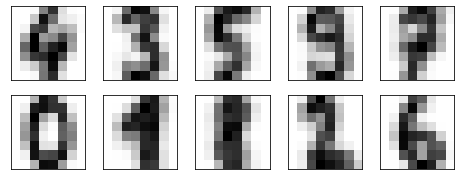

In [52]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [53]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951